# Analysis of Historical Tsunami Data  by MOHAMMAD FAIZ JABIR 

## Introduction
### This notebook analyzes historical tsunami data to identify patterns, trends, and potential risk factors. The objective is to predict future tsunami risks and aid in disaster preparedness and mitigation strategies.


## Dataset Description
### The dataset used is sourced from KAGGLE [ https://www.kaggle.com/datasets/andrewmvd/tsunami-dataset ]. It includes information on tsunamis such as date, location, magnitude, depth, and impact. 

In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df=pd.read_csv("/kaggle/input/tsunami-dataset/tsunami_dataset.csv")

#To know the dimension of the dataset
print(df.shape)

#Printing the dataset
df

(2259, 21)


,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS
0,12,-330,NaN,NaN,NaN,NaN,40.000,25.000,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,...,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"330 B.C. Aegean Sea, Sporades Islands, 40 N 25..."
1,481,1764,2.0,11.0,NaN,NaN,51.450,-2.583,"BRISTOL, ENGLAND",UK,...,Unknown,Very Doubtful Tsunami,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"Reference #1894, in full: ""On Saturday the 11t..."
2,71,859,NaN,NaN,NaN,NaN,36.080,36.250,SAMANDAGI,TURKEY,...,Earthquake,Questionable Tsunami,NaN,NaN,3.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"859 (possibly 861), November. Levantian Sea, N..."
3,186,1580,1.0,NaN,NaN,NaN,40.000,128.000,YELLOW SEA,NORTH KOREA,...,Unknown,Very Doubtful Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...
4,5,-1300,NaN,NaN,NaN,NaN,39.960,26.240,"IONIAN COASTS, TROAD",TURKEY,...,Unknown,Questionable Tsunami,6.0,NaN,5.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,1300 B.C. Ionian and Aegean Seas. References t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,5753,2020,7.0,22.0,6.0,12.0,55.030,-158.522,"SHUMAGIN ISLANDS, AK",USA,...,Earthquake,Definite Tsunami,7.8,28.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,NaN
2255,5750,2020,6.0,18.0,12.0,49.0,-33.294,-177.838,"S OF RAOUL ISLAND, KERMADEC ISLANDS",NEW ZEALAND,...,Earthquake,Definite Tsunami,7.4,10.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A small tsunami (12 cm) occurred today followi...
2256,5752,2013,4.0,22.0,1.0,16.0,18.081,-102.182,MEXICO,MEXICO,...,Earthquake,Probable Tsunami,6.0,30.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"In the same subduction zone, earthquakes of Ap..."
2257,5749,1867,6.0,10.0,NaN,NaN,-7.800,110.400,JAVA,INDONESIA,...,Earthquake,Very Doubtful Tsunami,NaN,NaN,NaN,Severe (~>$5 to $24 million),Many (~101 to 1000 houses),Few (~1 to 50 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A seaquake was observed in the backarc. While ...


In [6]:
# # Calculate the total number of missing values in each column of the DataFrame
missing_values=df.isnull().sum()
missing_values

ID                             0
YEAR                           0
MONTH                        104
DAY                          177
HOUR                         951
MINUTE                      1024
LATITUDE                       0
LONGITUDE                      0
LOCATION_NAME                  9
COUNTRY                        0
REGION                         1
CAUSE                          1
EVENT_VALIDITY                 0
EQ_MAGNITUDE                 785
EQ_DEPTH                    1352
TS_INTENSITY                1158
DAMAGE_TOTAL_DESCRIPTION    1204
HOUSES_TOTAL_DESCRIPTION    1653
DEATHS_TOTAL_DESCRIPTION    1585
URL                            0
COMMENTS                     164
dtype: int64

In [7]:
df.describe()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
count,2259.000000,2259.000000,2155.000000,2082.000000,1308.000000,1235.000000,2259.000000,2259.000000,1474.000000,907.000000,1101.000000
mean,2332.022134,1819.188136,6.622738,15.700768,11.318807,28.353846,17.002135,40.346320,7.046676,36.298787,1.376985
std,1665.174408,354.081686,3.460098,8.656968,6.979589,17.223160,27.730844,104.605369,0.796125,41.098547,1.840800
min,1.000000,-2000.000000,1.000000,1.000000,0.000000,0.000000,-63.000000,-179.971000,3.200000,0.000000,-4.140000
25%,1090.500000,1835.500000,4.000000,8.000000,5.000000,14.000000,-5.000000,-70.200000,6.600000,17.000000,0.500000
50%,1932.000000,1909.000000,7.000000,16.000000,11.000000,29.000000,23.000000,34.400000,7.000000,31.000000,1.500000
75%,3353.000000,1968.000000,10.000000,23.000000,18.000000,43.000000,38.670000,137.832500,7.600000,40.000000,3.000000
max,5753.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,71.813000,179.984000,9.500000,600.000000,9.000000


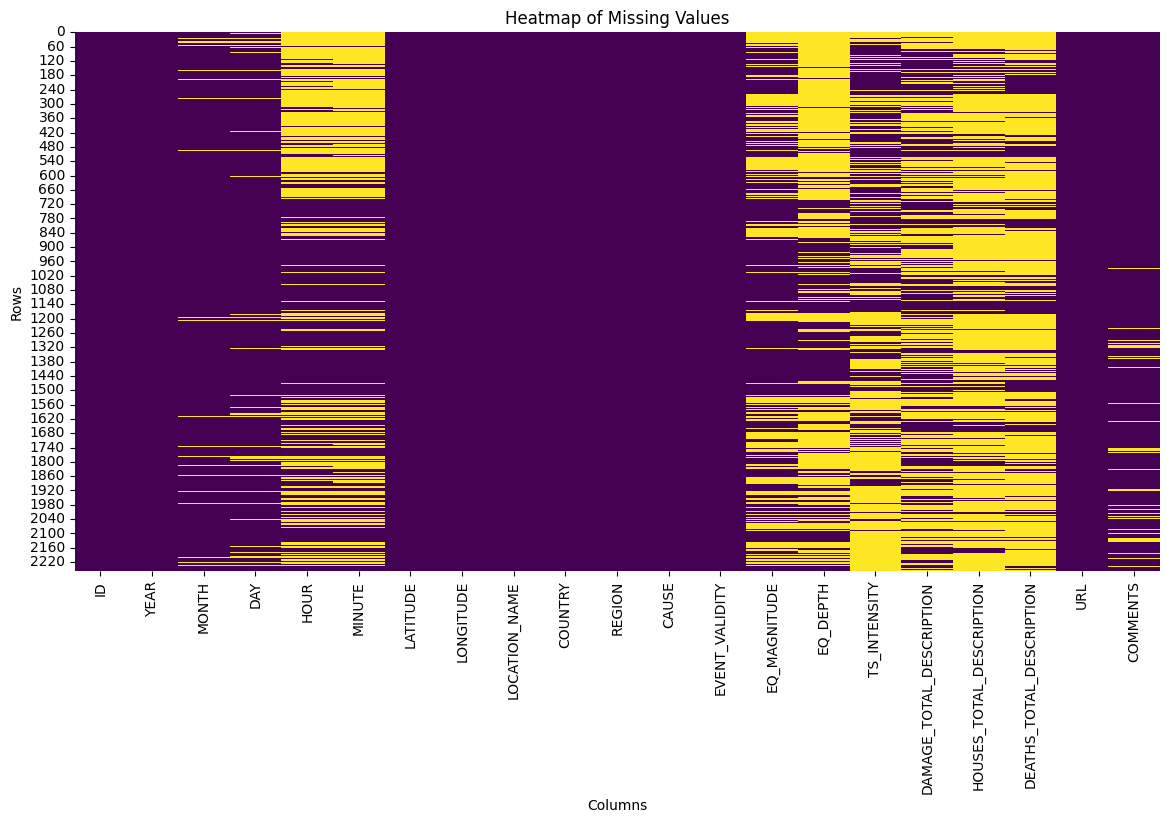

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(14, 7))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [9]:
# Fill missing numerical values with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that there are no more missing values in the dataset
df.isnull().sum()

ID                          0
YEAR                        0
MONTH                       0
DAY                         0
HOUR                        0
MINUTE                      0
LATITUDE                    0
LONGITUDE                   0
LOCATION_NAME               0
COUNTRY                     0
REGION                      0
CAUSE                       0
EVENT_VALIDITY              0
EQ_MAGNITUDE                0
EQ_DEPTH                    0
TS_INTENSITY                0
DAMAGE_TOTAL_DESCRIPTION    0
HOUSES_TOTAL_DESCRIPTION    0
DEATHS_TOTAL_DESCRIPTION    0
URL                         0
COMMENTS                    0
dtype: int64

In [10]:
df.dtypes

ID                            int64
YEAR                          int64
MONTH                       float64
DAY                         float64
HOUR                        float64
MINUTE                      float64
LATITUDE                    float64
LONGITUDE                   float64
LOCATION_NAME                object
COUNTRY                      object
REGION                       object
CAUSE                        object
EVENT_VALIDITY               object
EQ_MAGNITUDE                float64
EQ_DEPTH                    float64
TS_INTENSITY                float64
DAMAGE_TOTAL_DESCRIPTION     object
HOUSES_TOTAL_DESCRIPTION     object
DEATHS_TOTAL_DESCRIPTION     object
URL                          object
COMMENTS                     object
dtype: object

##  Number of Tsunamis per Year (From 1900 Onwards)
### This bar chart illustrates the number of tsunamis recorded per year from 1900 onwards. The graph highlights the frequency of tsunamis over the decades, providing insights into trends and fluctuations in tsunami occurrences over the past century. Observing the data, we can identify periods with higher or lower tsunami activity, which can be crucial for understanding historical patterns and predicting future risks.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


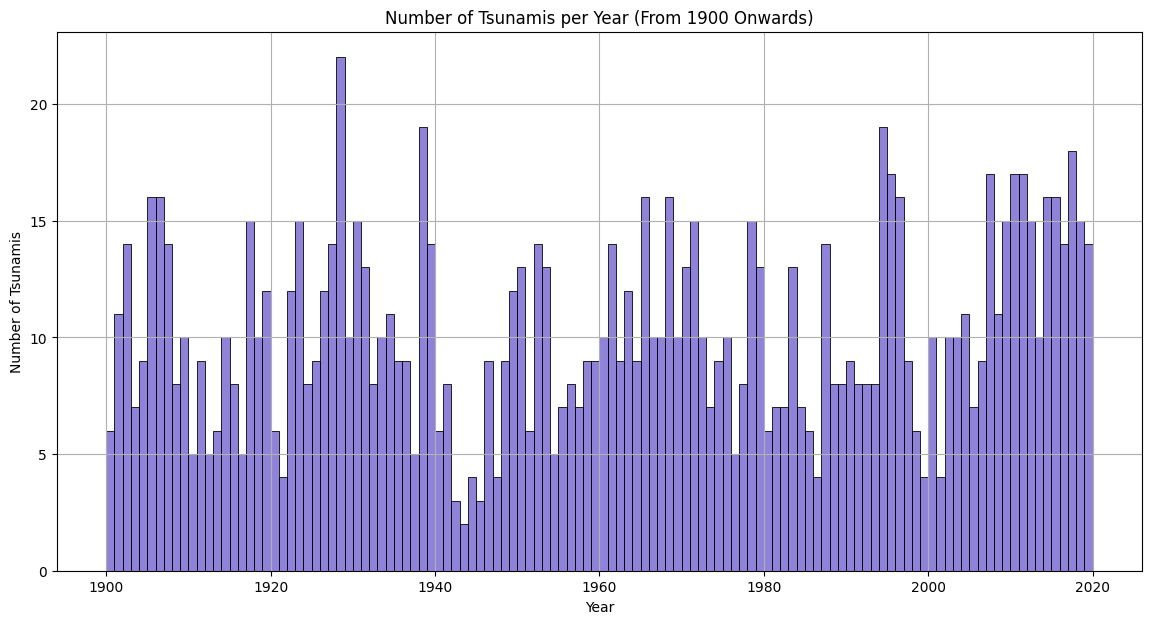

In [11]:

df_recent = df[df['YEAR'] >= 1900]

# Plot the number of tsunamis per year again
plt.figure(figsize=(14, 7))
sns.histplot(df_recent['YEAR'], bins=range(int(df_recent['YEAR'].min()), int(df_recent['YEAR'].max()) + 1), kde=False,color='slateblue',edgecolor='black')
plt.title('Number of Tsunamis per Year (From 1900 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Tsunamis')
plt.grid(True)
plt.show()


## Average Tsunami Intensity by Year
### This line chart displays the average tsunami intensity for each year from 1900 onwards. The intensity is calculated based on the available data and helps in identifying trends and variations in tsunami severity over the years. Observing these patterns can provide insights into changes in tsunami behavior and assist in developing better predictive models for future occurrences.


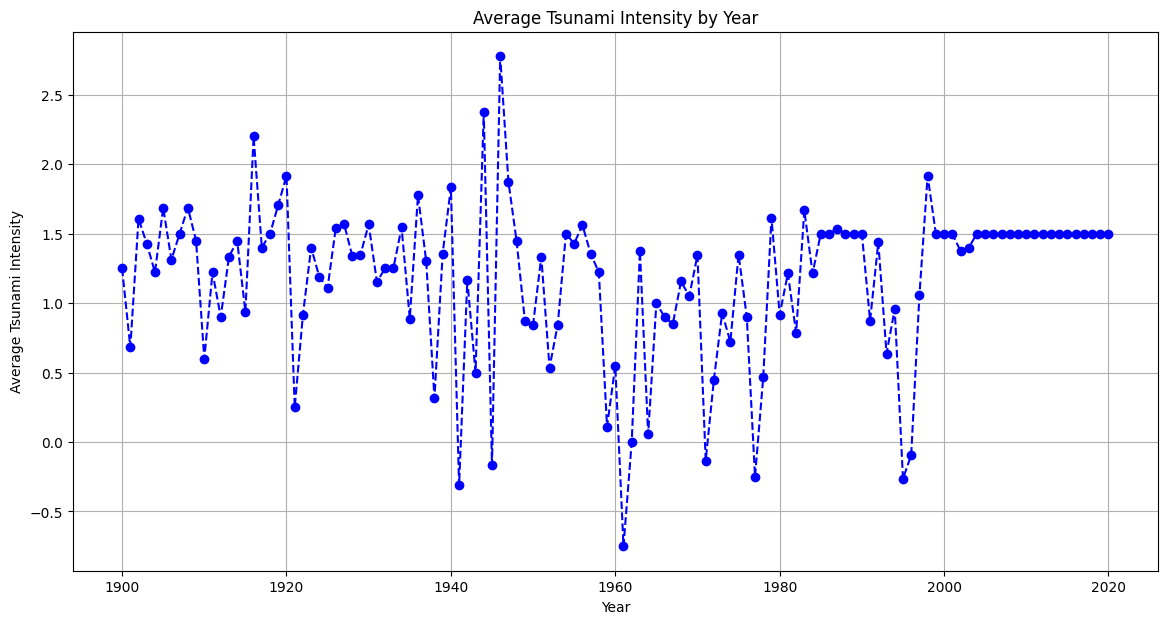

In [12]:
# Filter the dataset to include only years from 1900 onwards and drop rows with missing values in 'YEAR' and 'TS_INTENSITY'
df_recent = df[df['YEAR'] >= 1900].dropna(subset=['YEAR', 'TS_INTENSITY'])

# Calculate the average tsunami intensity per year
average_intensity_per_year = df_recent.groupby('YEAR')['TS_INTENSITY'].mean()

# Plot the average tsunami intensity by year
plt.figure(figsize=(14, 7))
plt.plot(average_intensity_per_year, marker='o', linestyle='--', color='b')
plt.title('Average Tsunami Intensity by Year')
plt.xlabel('Year')
plt.ylabel('Average Tsunami Intensity')
plt.grid(True)
plt.show()


## Count of Tsunamis by Cause
### This pie chart represents the distribution of tsunamis by their causes. It categorizes tsunamis based on the underlying factors such as earthquakes, volcanic activity, landslides, meteorological events, and other causes. The chart provides a visual representation of the proportion of tsunamis attributed to each cause, highlighting the most common and least common triggers.


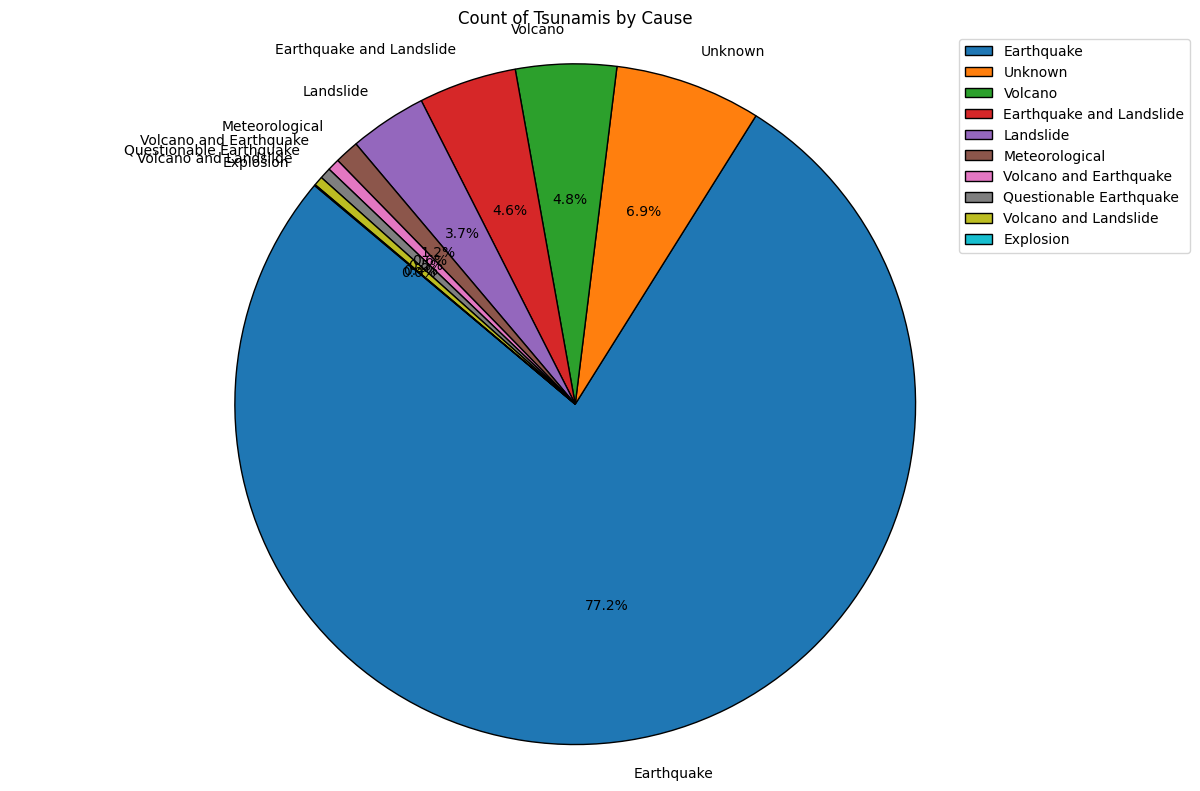

In [13]:
# Filter the dataset to include only rows with non-missing 'CAUSE' values
df_clean = df.dropna(subset=['CAUSE'])

# Count the occurrences of each cause
cause_data = df_clean['CAUSE'].value_counts()

# Plot the pie chart with improved layout
plt.figure(figsize=(12, 8))
plt.pie(cause_data, labels=cause_data.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Count of Tsunamis by Cause')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a legend outside the pie chart
plt.legend(cause_data.index, bbox_to_anchor=(1.05, 1), loc='best')

plt.tight_layout()
plt.show()


## Number of Tsunamis by Place Name (Top 20)
### This bar chart shows the top 20 locations with the highest number of recorded tsunamis. The chart provides a visual comparison of these locations, highlighting areas with the most frequent tsunami occurrences. This information is crucial for understanding regional vulnerability to tsunamis and focusing on disaster preparedness and mitigation efforts in the most affected areas.


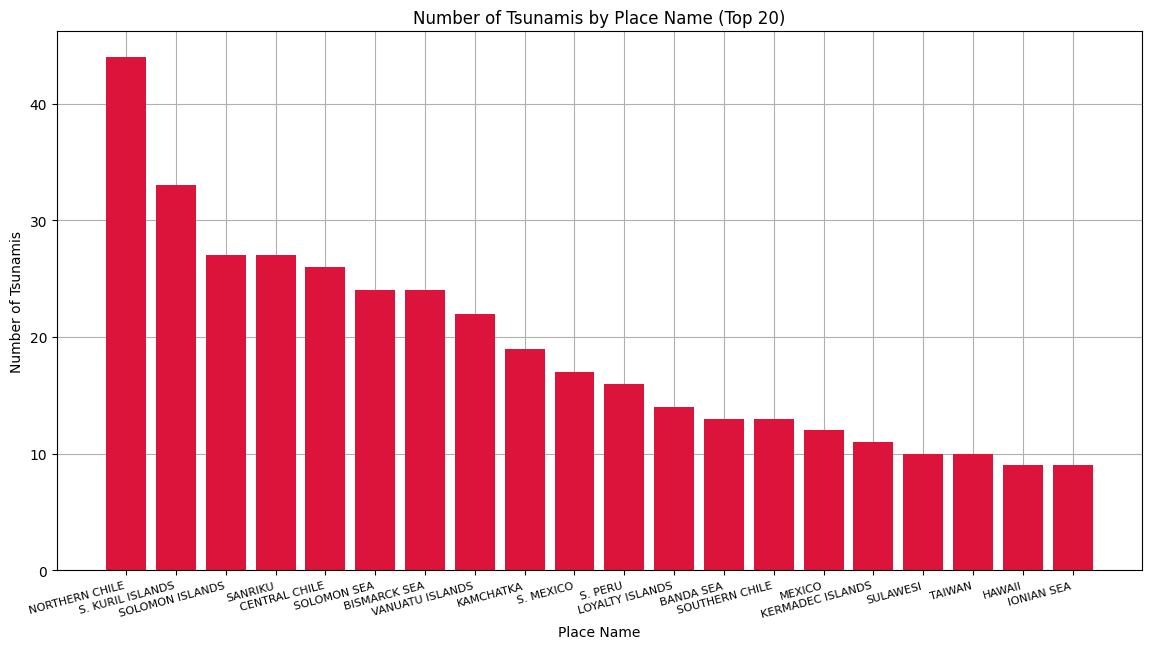

303      NORTHERN CHILE
380    S. KURIL ISLANDS
413     SOLOMON ISLANDS
393             SANRIKU
67        CENTRAL CHILE
414         SOLOMON SEA
42         BISMARCK SEA
467     VANUATU ISLANDS
194           KAMCHATKA
381           S. MEXICO
385             S. PERU
243     LOYALTY ISLANDS
34            BANDA SEA
426      SOUTHERN CHILE
261              MEXICO
207    KERMADEC ISLANDS
430            SULAWESI
439              TAIWAN
161              HAWAII
179          IONIAN SEA
Name: LOCATION_NAME, dtype: object
303    44
380    33
413    27
393    27
67     26
414    24
42     24
467    22
194    19
381    17
385    16
243    14
34     13
426    13
261    12
207    11
430    10
439    10
161     9
179     9
Name: num_tsunamis, dtype: int64


In [14]:
# Filter the dataset to include only years from 1900 onwards
df_recent = df[df['YEAR'] >= 1900]

# Aggregate data by place name
place_data = df_recent.groupby('LOCATION_NAME').agg(
    num_tsunamis=('ID', 'count')
).reset_index()

# Sort by the number of tsunamis
place_data = place_data.sort_values(by='num_tsunamis', ascending=False)

# Display the top 20 places for better visualization
top_places = place_data.head(20)

# Plot the number of tsunamis by place name
plt.figure(figsize=(14, 7))
plt.bar(top_places['LOCATION_NAME'], top_places['num_tsunamis'], color='crimson',zorder=2)
plt.title('Number of Tsunamis by Place Name (Top 20)')
plt.xlabel('Place Name')
plt.ylabel('Number of Tsunamis')
plt.xticks(rotation=15, ha='right', fontsize=8) 
plt.grid(True,zorder=0)
plt.show()


print (top_places['LOCATION_NAME'])

print(top_places['num_tsunamis'])



## Number of Tsunamis by Month
### This bar chart illustrates the number of tsunamis recorded for each month of the year. By analyzing the distribution of tsunamis across different months, we can identify any seasonal patterns or trends in tsunami occurrences. This information can be useful for understanding the temporal aspects of tsunami risks and preparing for potential seasonal variations.


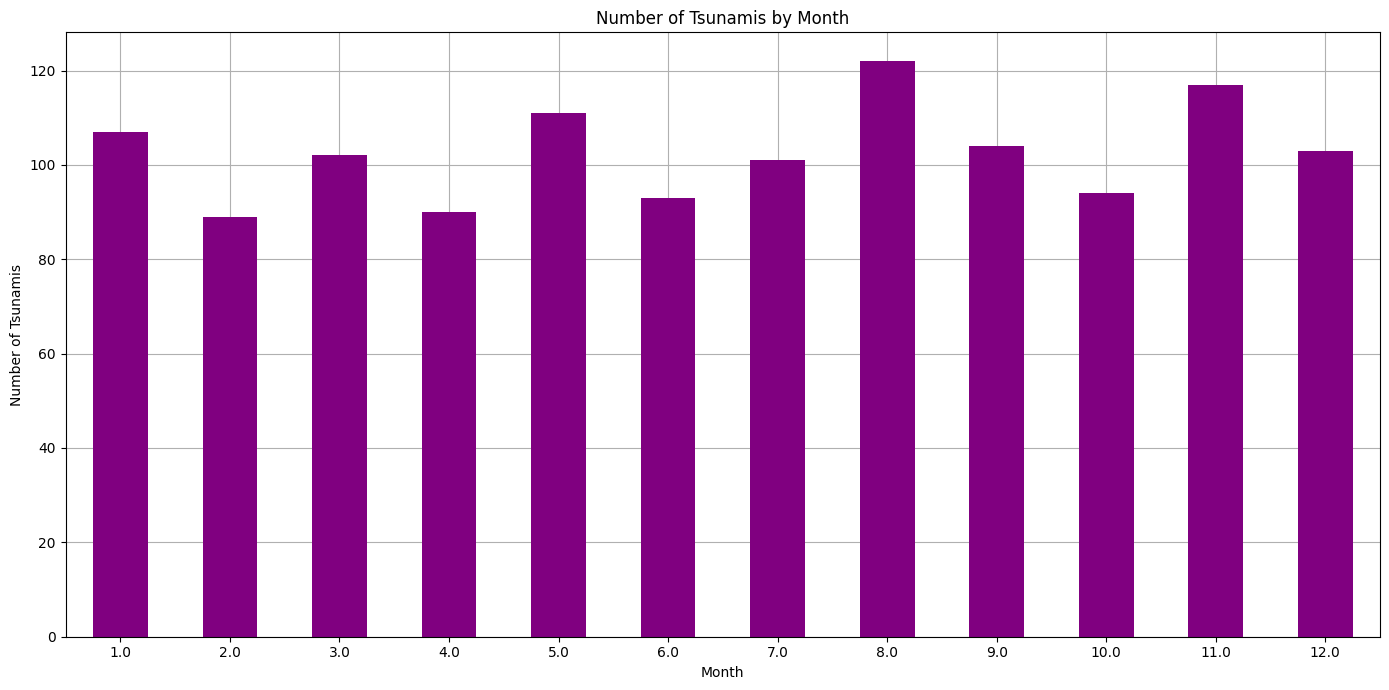

In [15]:
month_data = df_recent['MONTH'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
month_data.plot(kind='bar', color='purple',zorder=2)
plt.title('Number of Tsunamis by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tsunamis')
plt.xticks(rotation=0)
plt.grid(True,zorder=0)
plt.tight_layout()
plt.show()


## Number of Tsunamis by Cause
### This bar chart displays the number of tsunamis categorized by their causes. The chart highlights the prevalence of different causes, such as earthquakes, landslides, volcanic activities, and other factors. By comparing the frequency of each cause, we can identify the primary triggers of tsunamis and better understand the natural phenomena contributing to their occurrences.


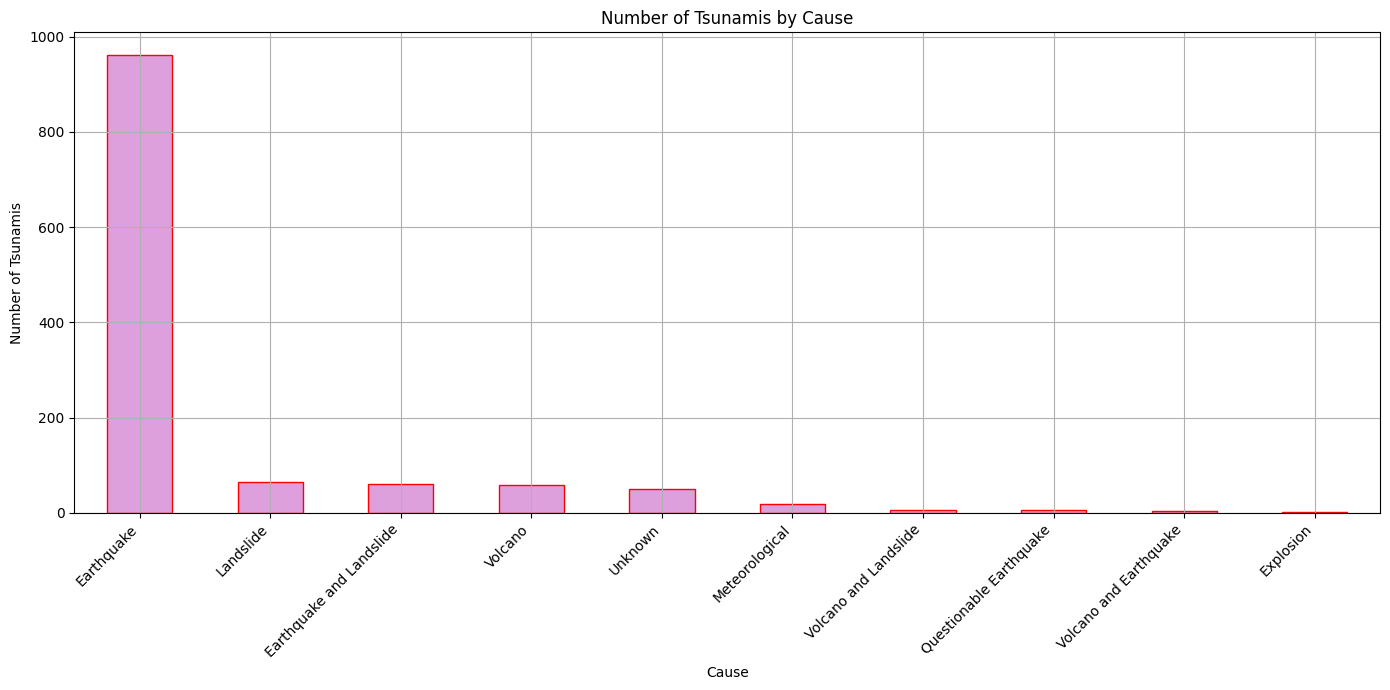

In [16]:
# Count the occurrences of each cause
cause_data = df_recent['CAUSE'].value_counts()

# Plot the number of tsunamis by cause
plt.figure(figsize=(14, 7))
cause_data.plot(kind='bar', color='plum',edgecolor="red")
plt.title('Number of Tsunamis by Cause')
plt.xlabel('Cause')
plt.ylabel('Number of Tsunamis')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()





## Distribution of Tsunami Intensities
### This histogram shows the distribution of tsunami intensities recorded in the dataset. The x-axis represents the intensity levels, while the y-axis indicates the frequency of tsunamis for each intensity level. This visualization helps in understanding the common intensity levels of tsunamis and identifying any outliers or extreme values in the data.


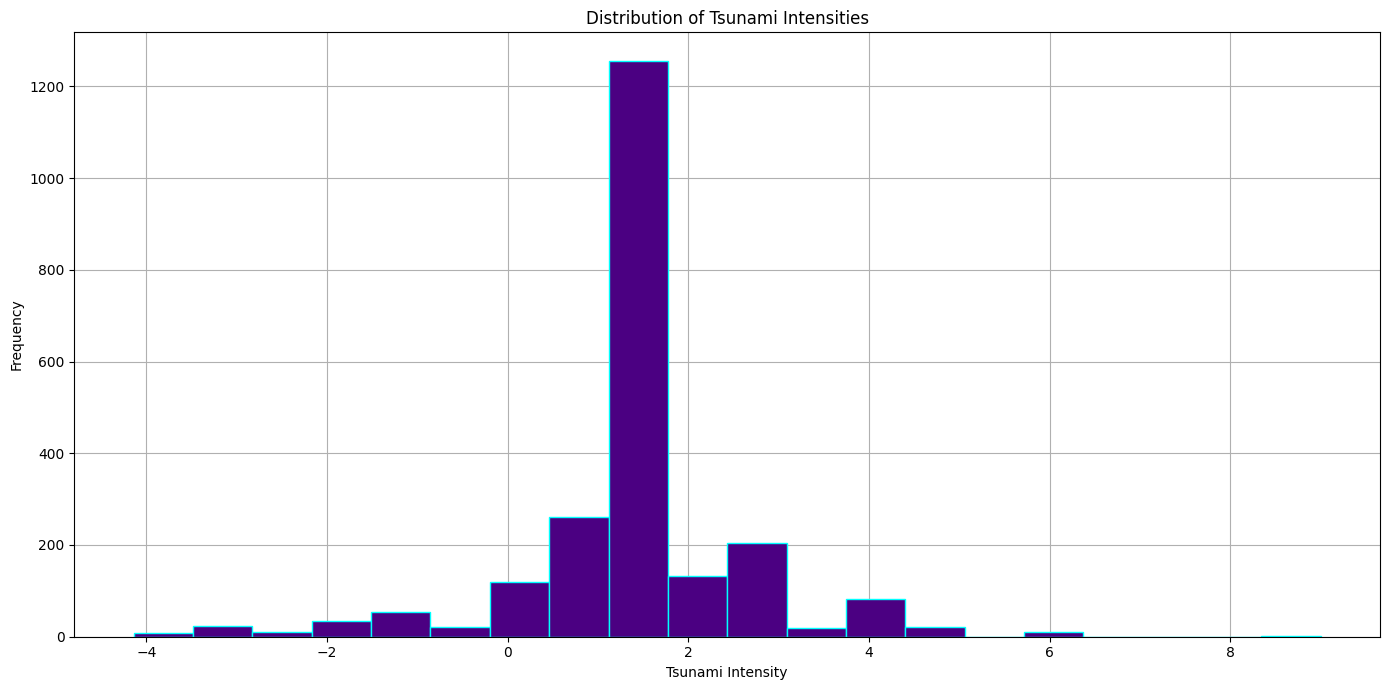

In [17]:
# Extract the TS_INTENSITY column as ts_intensity_data
ts_intensity_data = df['TS_INTENSITY']

# Plot the distribution of tsunami intensities
plt.figure(figsize=(14, 7))
plt.hist(ts_intensity_data, bins=20, color='indigo', edgecolor='cyan',zorder=2)
plt.title('Distribution of Tsunami Intensities')
plt.xlabel('Tsunami Intensity')
plt.ylabel('Frequency')
plt.grid(True,zorder=0)
plt.tight_layout()
plt.show()


## Distribution of Earthquake Magnitudes Causing Tsunamis
### This histogram shows the distribution of earthquake magnitudes that have caused tsunamis. The x-axis represents the magnitude of the earthquakes, while the y-axis indicates the frequency of tsunamis triggered by earthquakes of each magnitude. This visualization helps to identify the most common magnitudes of earthquakes that result in tsunamis and provides insight into the seismic activity that leads to these events.


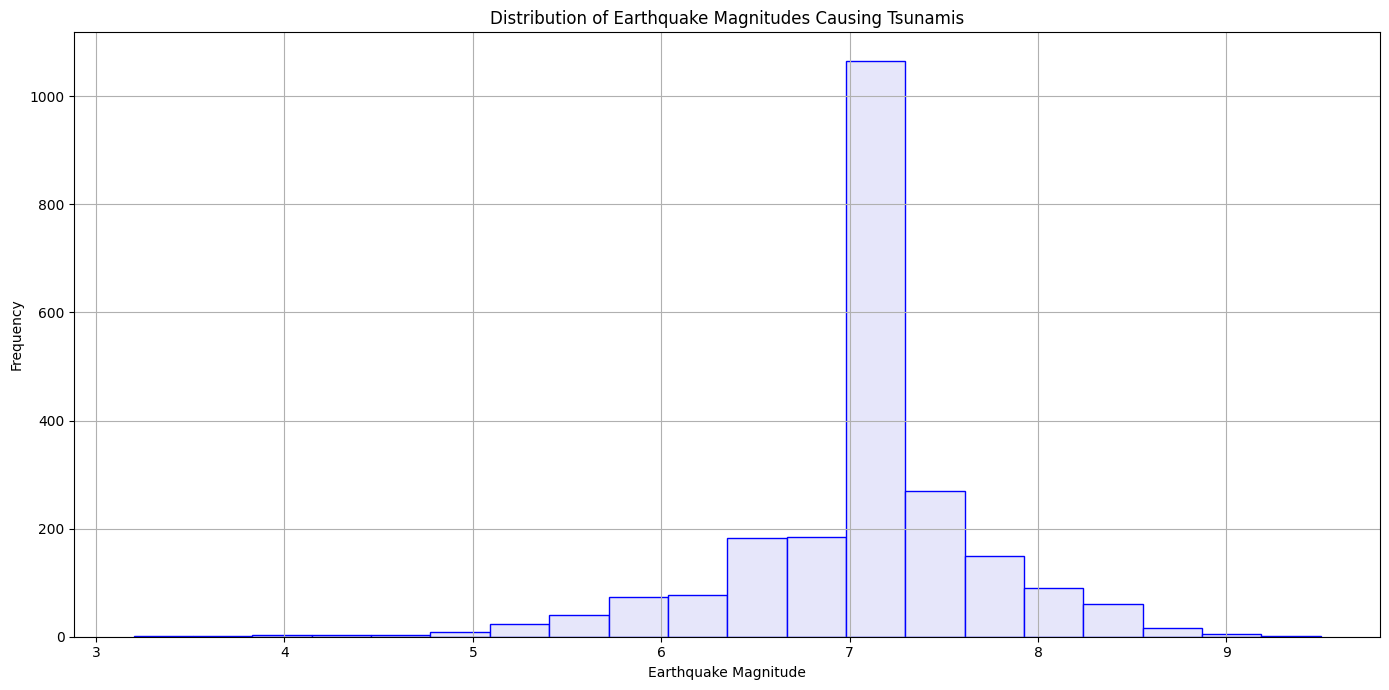

In [18]:
# Extract the EQ_MAGNITUDE column as eq_magnitude_data
eq_magnitude_data = df['EQ_MAGNITUDE']

# Plot the distribution of earthquake magnitudes
plt.figure(figsize=(14, 7))
plt.hist(eq_magnitude_data, bins=20, color='lavender', edgecolor='blue')
plt.title('Distribution of Earthquake Magnitudes Causing Tsunamis')
plt.xlabel('Earthquake Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


## Distribution of Earthquake Depths Causing Tsunamis
### This histogram shows the distribution of earthquake depths that have caused tsunamis. The x-axis represents the depth of the earthquakes in kilometers, while the y-axis indicates the frequency of tsunamis triggered by earthquakes at each depth. This visualization helps to identify the common depths at which earthquakes lead to tsunamis, providing insights into the seismic activity related to tsunami generation.


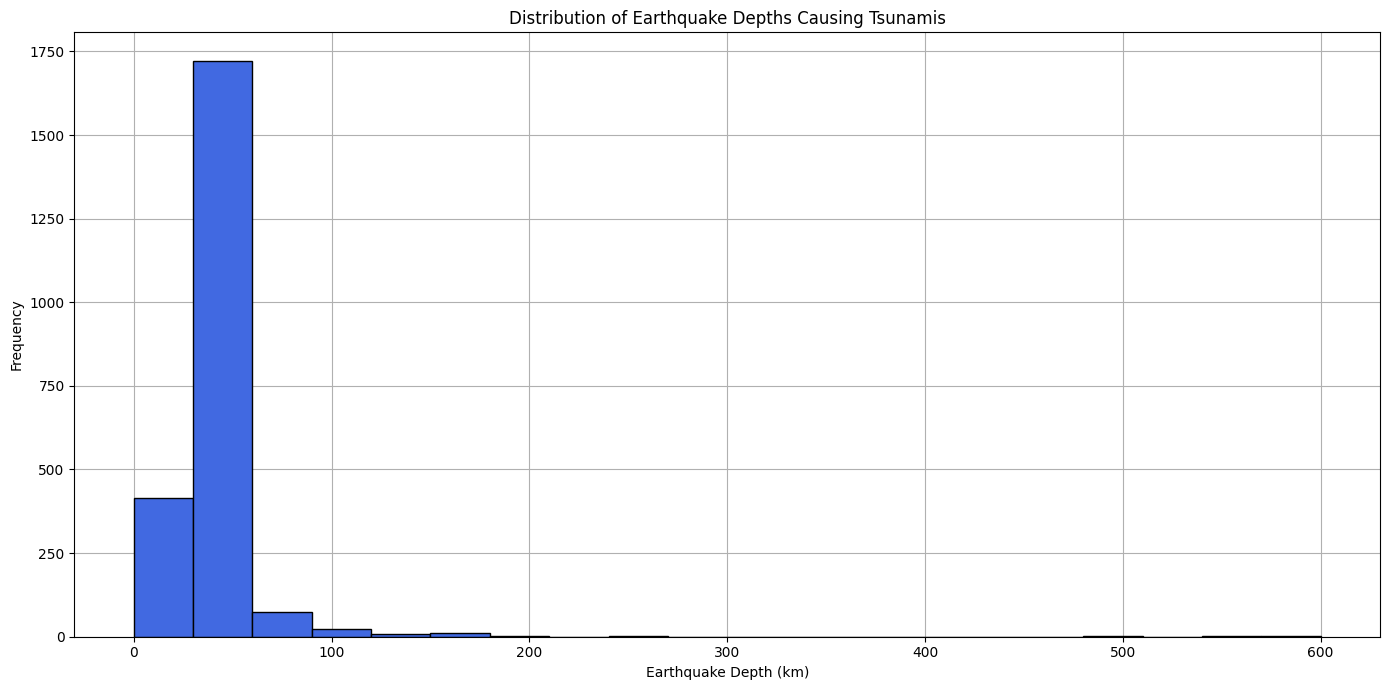

In [19]:
# Extract the EQ_DEPTH column as eq_depth_data
eq_depth_data = df['EQ_DEPTH']

# Plot the distribution of earthquake depths
plt.figure(figsize=(14, 7))
plt.hist(eq_depth_data, bins=20, color='royalblue', edgecolor='black',zorder=2)
plt.title('Distribution of Earthquake Depths Causing Tsunamis')
plt.xlabel('Earthquake Depth (km)')
plt.ylabel('Frequency')
plt.grid(True,zorder=0)
plt.tight_layout()
plt.show()


## Earthquake Magnitude vs Tsunami Intensity
### This scatter plot shows the relationship between earthquake magnitudes and the resulting tsunami intensities. The x-axis represents the magnitude of the earthquakes, while the y-axis indicates the intensity of the tsunamis triggered by these earthquakes. This visualization helps in understanding if there is a correlation between the magnitude of an earthquake and the intensity of the resulting tsunami, providing insights into the dynamics of tsunami generation.


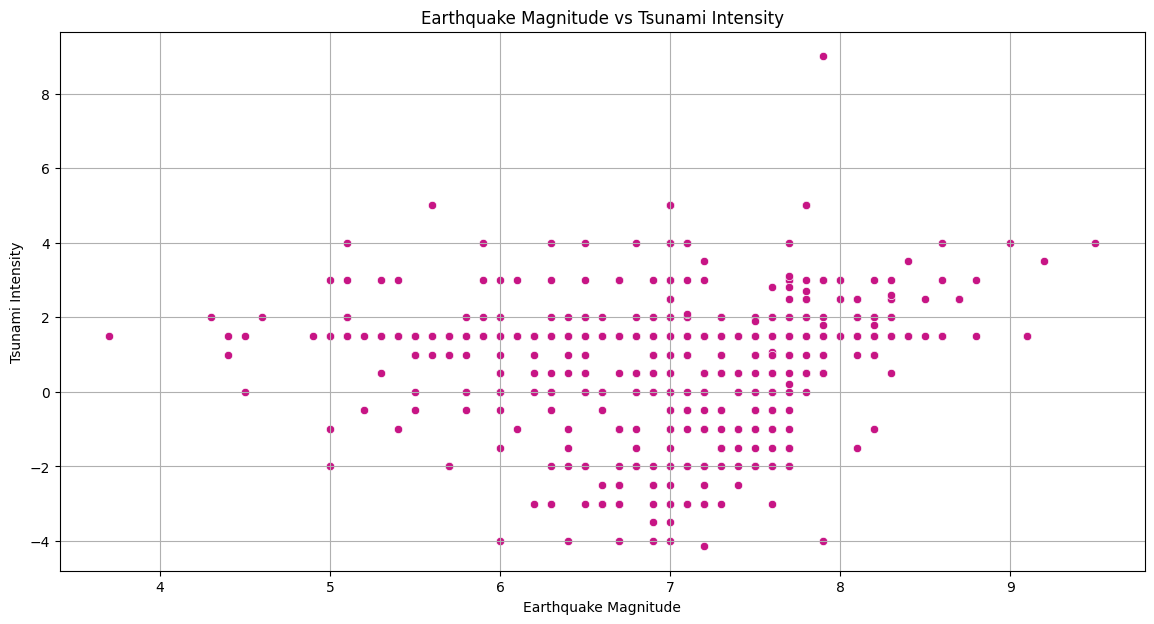

In [20]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_recent, x='EQ_MAGNITUDE', y='TS_INTENSITY',color="mediumvioletred")
plt.title('Earthquake Magnitude vs Tsunami Intensity')
plt.xlabel('Earthquake Magnitude')
plt.ylabel('Tsunami Intensity')
plt.grid(True)
plt.show()
#Explanation: This scatter plot helps identify if there is a relationship between the magnitude of the earthquake and the intensity of the tsunami. This can provide insights into whether stronger earthquakes tend to cause more intense tsunamis.
 #Calculate the correlation coefficient for earthquake magnitude and tsunami intensity


## Tsunami Intensity vs. Earthquake Depth
### This scatter plot illustrates the relationship between the depth of earthquakes and the resulting tsunami intensities. The x-axis represents the earthquake depths in kilometers, while the y-axis indicates the intensity of the tsunamis triggered by these earthquakes. This visualization helps in understanding if there is a correlation between the depth of an earthquake and the intensity of the resulting tsunami, providing insights into the dynamics of tsunami generation from different earthquake depths.


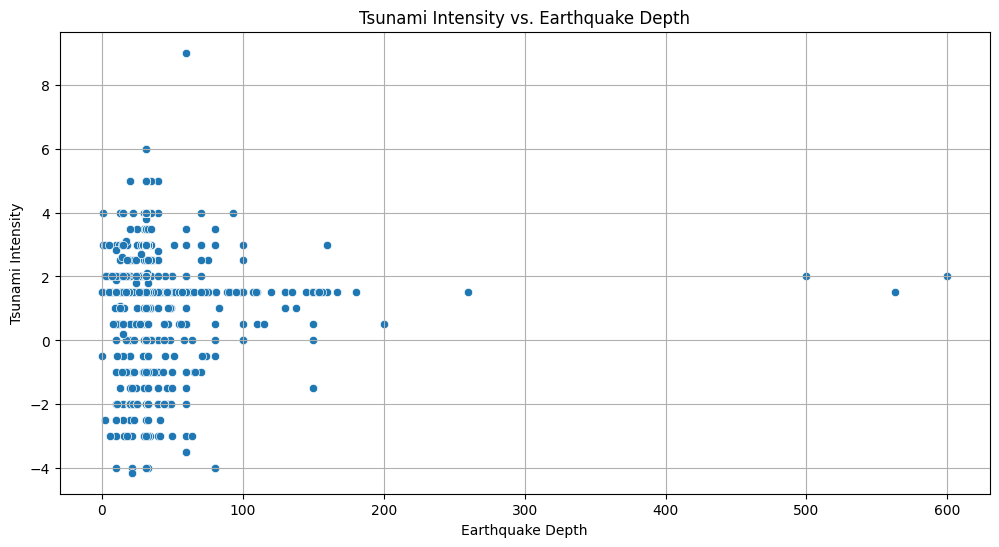

In [21]:
# Ensure the data is clean and has no missing values for the columns of interest
df_clean_depth = df.dropna(subset=['EQ_DEPTH', 'TS_INTENSITY'])

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EQ_DEPTH', y='TS_INTENSITY', data=df_clean_depth)
plt.title('Tsunami Intensity vs. Earthquake Depth')
plt.xlabel('Earthquake Depth')
plt.ylabel('Tsunami Intensity')
plt.grid()
plt.show()



## Geographical Distribution of Tsunami Events
### This scatter plot shows the geographical distribution of tsunami events based on their latitude and longitude. Each point represents a tsunami event, with the color indicating the intensity of the tsunami and the size representing the magnitude of the earthquake that caused it. This visualization helps to identify the regions most affected by tsunamis and the relationship between earthquake magnitudes and tsunami intensities.


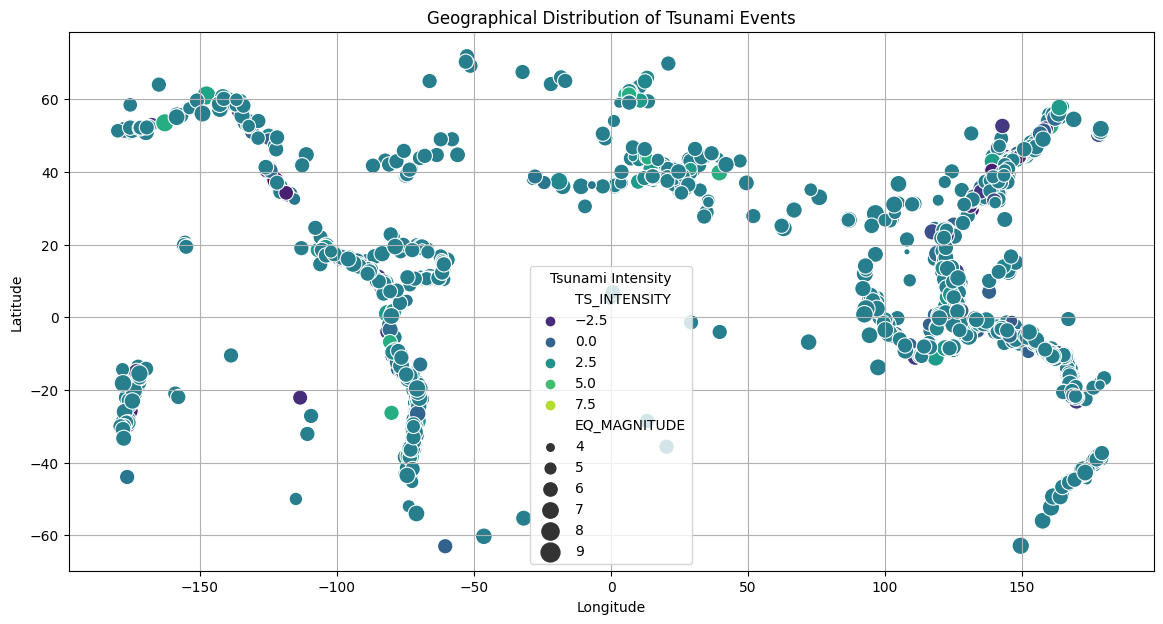

In [22]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_recent, x='LONGITUDE', y='LATITUDE', hue='TS_INTENSITY', palette='viridis', size='EQ_MAGNITUDE', sizes=(20, 200))
plt.title('Geographical Distribution of Tsunami Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Tsunami Intensity')
plt.grid(True)
plt.show()
#Explanation: This plot shows where tsunamis have occurred globally, highlighting hotspots and potentially vulnerable regions.

## Correlation Heatmap
### This correlation heatmap displays the relationships between various features in the tsunami dataset. The values in each cell represent the Pearson correlation coefficient between the corresponding pair of features. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. This visualization helps in identifying the strength and direction of relationships between different variables, providing insights into potential dependencies and interactions within the data.


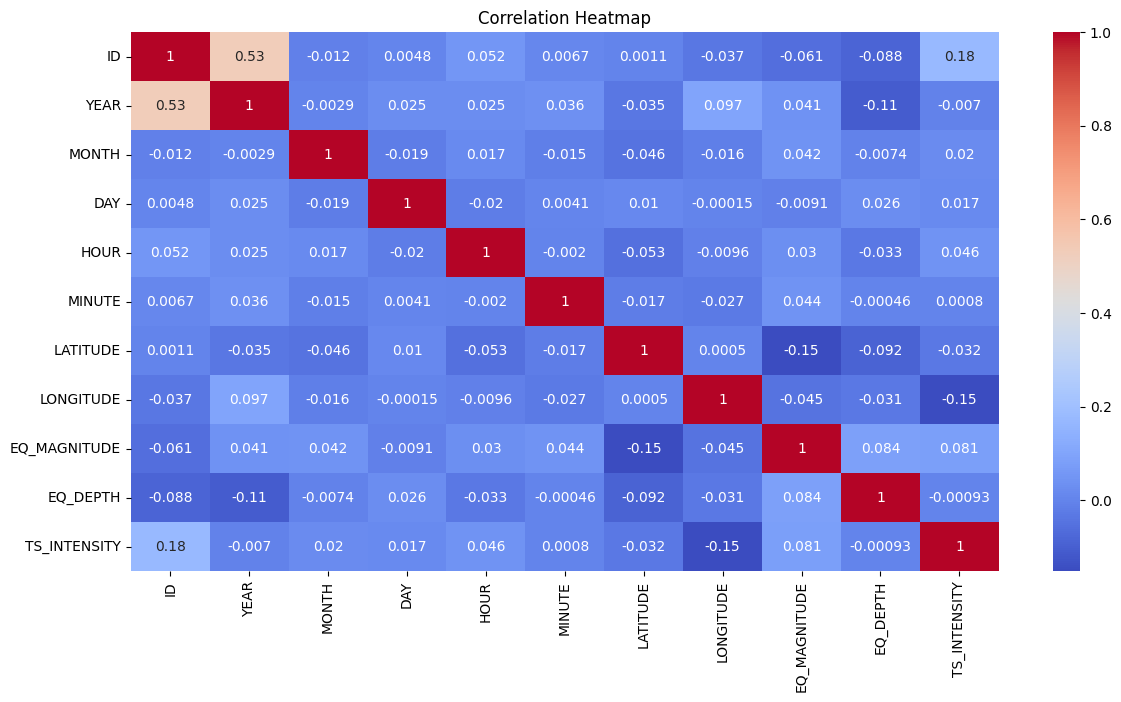

In [23]:
# Select only numerical columns for correlation
numerical_df = df_recent.select_dtypes(include=['float64', 'int64'])

# Plot a heatmap of the correlations between numerical features
plt.figure(figsize=(14, 7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
#Explanation Selecting Numerical Columns: The select_dtypes(include=['float64', 'int64']) function selects only the columns with numerical data types (float64 and int64), which are suitable for correlation analysis. Plotting the Heatmap: The sns.heatmap function creates the heatmap using the correlation matrix of the numerical columns.

## Total Damage vs. Number of Tsunamis
### This bar chart shows the number of tsunamis (in log scale) against the total damage categorized into four levels:
#### Limited : Most common, shown by the red bar. Moderate : Shown by the blue bar. Severe : Shown by the green bar. Extreme : Least common, shown by the yellow bar.

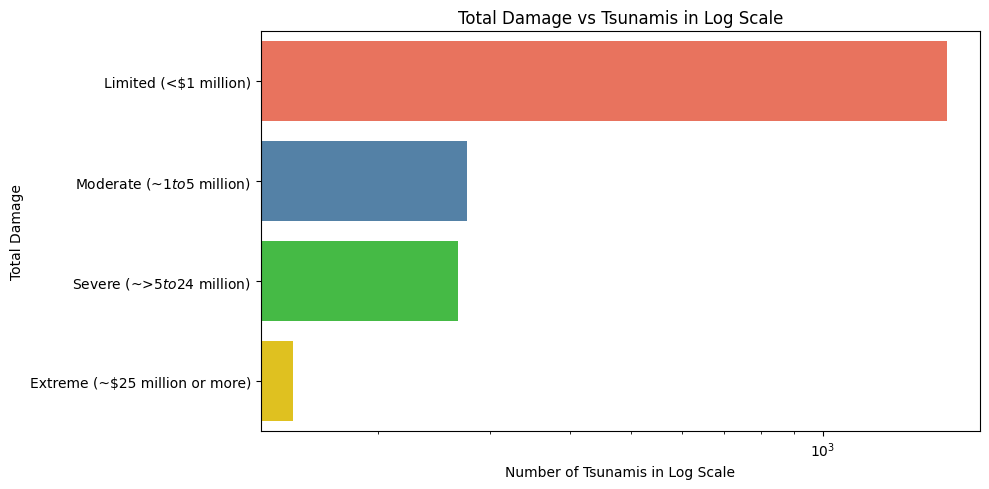

In [24]:
custom_palette = ["#FF6347", "#4682B4", "#32CD32", "#FFD700"]  
plt.figure(figsize=(10, 5))
ax = sns.countplot(y="DAMAGE_TOTAL_DESCRIPTION", data=df, order=df["DAMAGE_TOTAL_DESCRIPTION"].value_counts().index, palette=custom_palette)
ax.set_xscale("log")
ax.axes.set_title("Total Damage vs Tsunamis in Log Scale")
ax.set_xlabel("Number of Tsunamis in Log Scale")
ax.set_ylabel("Total Damage")
plt.tight_layout()
plt.show()


## House Damage vs. Number of Tsunamis
#### This bar chart shows the number of tsunamis (in log scale) against the house damage categorized into four levels:

##### Many : Most common, shown by the red bar. Very Many : Shown by the orange bar. Few : Shown by the pink bar. Some : Least common, shown by the dark purple bar.

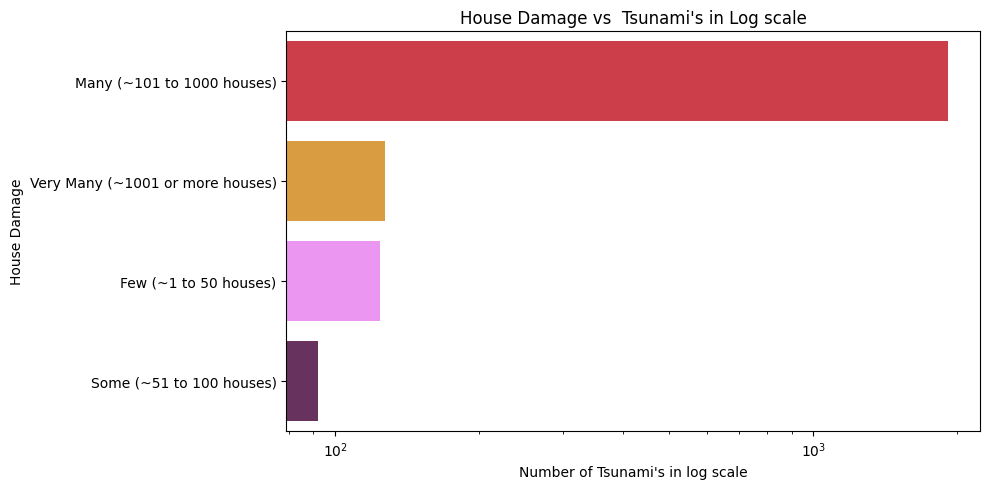

In [25]:
custom_palette = ["#e32636", "#f4a127", "#f887ff", "#702963"]
plt.figure(figsize=(10,5))
ax = sns.countplot(y="HOUSES_TOTAL_DESCRIPTION", data=df, order=df["HOUSES_TOTAL_DESCRIPTION"].value_counts().index, palette=custom_palette)
ax.set_xscale("log")
ax.axes.set_title("House Damage vs  Tsunami's in Log scale")
ax.set_xlabel("Number of Tsunami's in log scale")
ax.set_ylabel("House Damage")
ax.tick_params()
plt.tight_layout()
plt.show()

## Deaths vs. Number of Tsunamis
### This bar chart shows the number of tsunamis (in log scale) against the number of deaths categorized into four levels:

#### Few : Most common, shown by the pink bar.  Many: Shown by the light red bar. Very Many: Shown by the blue bar. Some Least common, shown by the gray bar

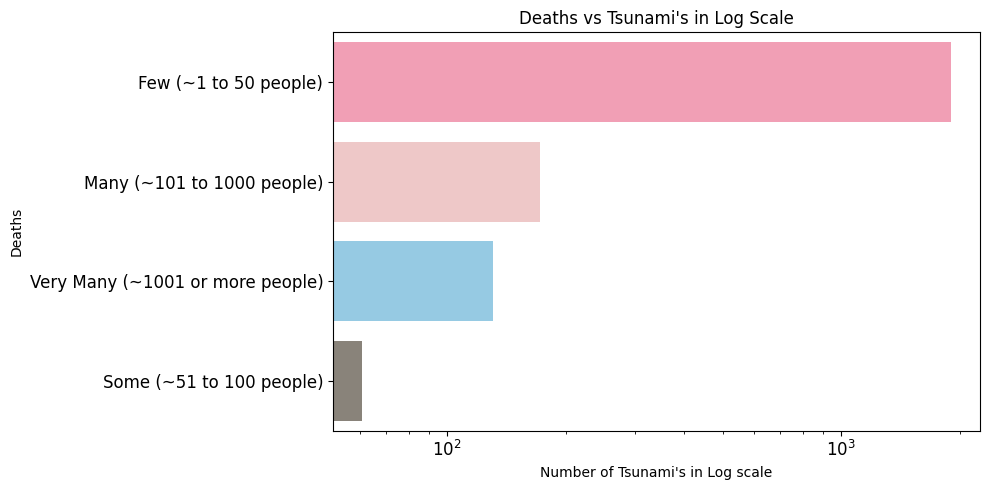

In [26]:
plt.figure(figsize=(10,5))
custom_palette = ["#ff91af", "#f4c2c2", "#89cff0", "#8b8378"]
ax = sns.countplot(y="DEATHS_TOTAL_DESCRIPTION", data=df, order=df["DEATHS_TOTAL_DESCRIPTION"].value_counts().index ,palette=custom_palette)
ax.set_xscale("log")
ax.axes.set_title("Deaths vs Tsunami's in Log Scale")
ax.set_xlabel("Number of Tsunami's in Log scale")
ax.set_ylabel("Deaths")
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

## ANOVA: Tsunami Intensity by Earthquake Magnitude Category
### This box plot presents the results of an ANOVA analysis comparing tsunami intensity across different earthquake magnitude categories. The F-value is 11.81, and the P-value is 1.12e-07, indicating a significant difference in tsunami intensity among the categories.

#### Low: Represented by the blue box.
#### Moderate: Represented by the orange box.
#### High: Represented by the gray box.
#### Very High: Represented by the red box.
#### The y-axis shows tsunami intensity (TS_INTENSITY), and the x-axis shows the earthquake magnitude category (MAGNITUDE_CAT). The plot indicates that higher earthquake magnitudes tend to result in higher tsunami intensities.

/tmp/ipykernel_34/1314106750.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby('MAGNITUDE_CAT')['TS_INTENSITY'].apply(list)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


F-Value: 11.814386818100552, P-Value: 1.1186652028121087e-07


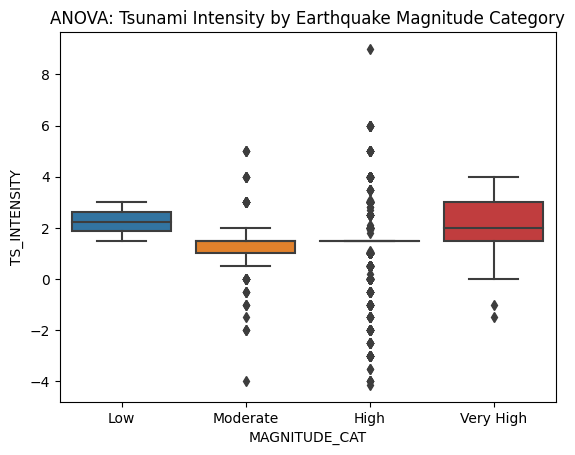

In [27]:

from scipy.stats import f_oneway


# Fill missing numerical values with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Select relevant columns and categorize EQ_MAGNITUDE
df['MAGNITUDE_CAT'] = pd.cut(df['EQ_MAGNITUDE'], bins=[0, 4, 6, 8, 10], labels=['Low', 'Moderate', 'High', 'Very High'])

# Drop rows with missing values in the relevant columns
df.dropna(subset=['MAGNITUDE_CAT', 'TS_INTENSITY'], inplace=True)

# Perform ANOVA
groups = df.groupby('MAGNITUDE_CAT')['TS_INTENSITY'].apply(list)
f_value, p_value = f_oneway(*groups)
print(f'F-Value: {f_value}, P-Value: {p_value}')

# Plot ANOVA results
sns.boxplot(x='MAGNITUDE_CAT', y='TS_INTENSITY', data=df)
plt.title('ANOVA: Tsunami Intensity by Earthquake Magnitude Category')
plt.show()


## Tsunami Counts Over Time
### This line chart displays the number of tsunamis recorded each year from 1900 to 2020.

#### Y-axis: Number of Tsunamis. X-axis: Year.
#### The chart shows fluctuations in tsunami occurrences over time, with peaks indicating years with higher tsunami activity. It helps in understanding trends and patterns in tsunami occurrences across different periods.

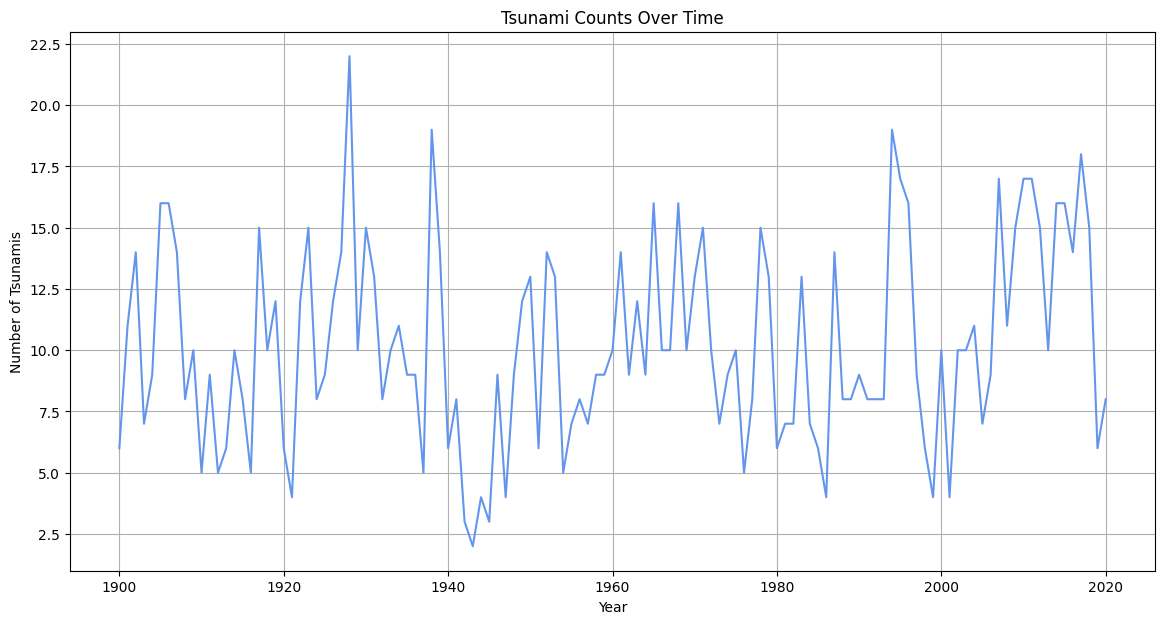

In [28]:
# Filter the dataset to include only years from 1900 onwards
df_recent = df[df['YEAR'] >= 1900]

# Time series analysis: Frequency of tsunamis per year
tsunami_counts = df_recent['YEAR'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(14, 7))
tsunami_counts.plot(color="cornflowerblue")
plt.title('Tsunami Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tsunamis')
plt.grid(True)
plt.show()


## Rolling Mean and Standard Deviation of Tsunami Counts Over Time
### This line chart presents the number of tsunamis recorded each year from 1900 to 2020, along with the rolling mean and rolling standard deviation.

#### Blue Line: Original number of tsunamis per year.
#### Red Line: Rolling mean, which smooths out short-term fluctuations to show longer-term trends.
#### Black Line: Rolling standard deviation, which measures the variability in the number of tsunamis over time.
#### The chart helps visualize trends and fluctuations in tsunami occurrences, highlighting periods of higher activity and variability.

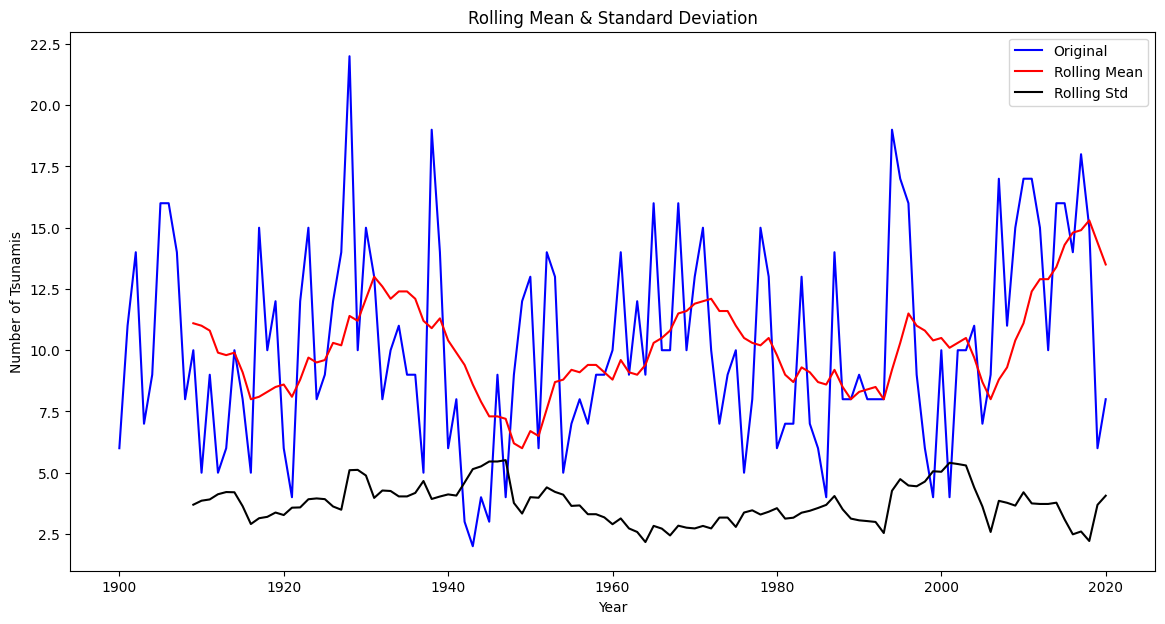

In [29]:
# Calculate rolling mean and standard deviation
rolling_mean = tsunami_counts.rolling(window=10).mean()
rolling_std = tsunami_counts.rolling(window=10).std()


# Plot rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(tsunami_counts, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Number of Tsunamis')
plt.legend()
plt.show()

## Differenced Time Series of Tsunami Counts
### This line chart presents the differenced time series of the number of tsunamis recorded each year from 1900 to 2020.

#### Y-axis: Differenced number of tsunamis.
#### X-axis: Year.
#### Differencing is a method used to make a time series stationary by subtracting the previous observation from the current observation. This chart highlights the changes in the number of tsunamis from year to year, helping to identify trends and patterns that might not be visible in the original time series data.

## ADF Test Results:
### ADF Statistic: -9.299836911485965
### p-value: 1.12021259248266e-15
### Critical Values:
### 1%: -3.487517288664615
### 5%: -2.8865777718038032
### 10%: -2.5801223912025212
#### The Augmented Dickey-Fuller (ADF) test results indicate that the differenced time series is stationary, as the ADF statistic is significantly lower than the critical values at all levels.



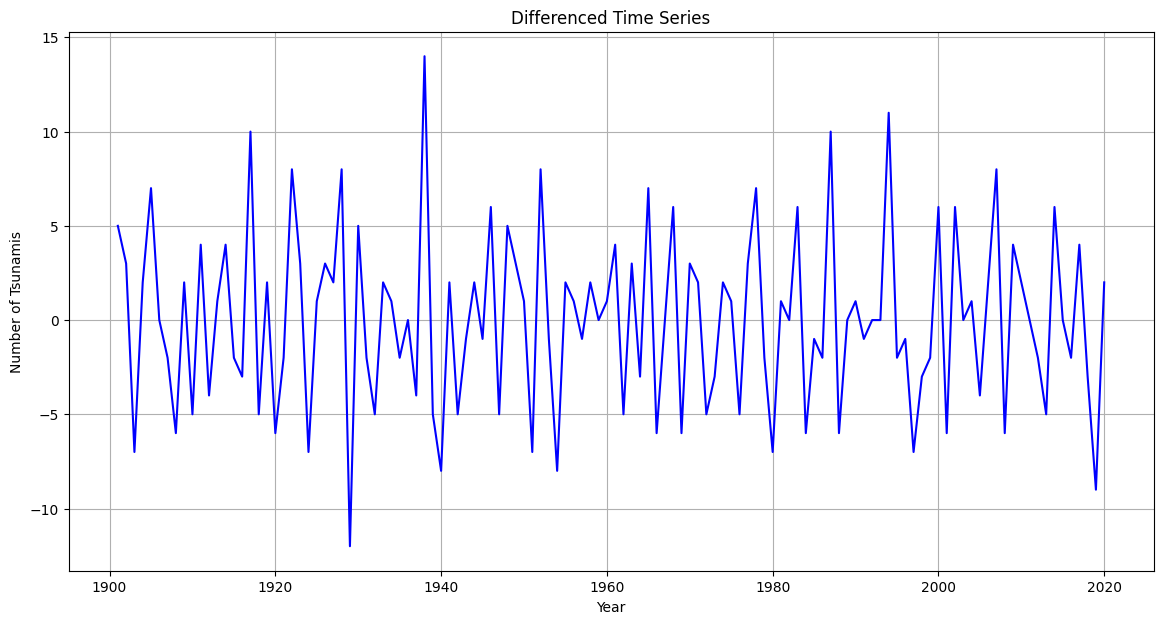

ADF Statistic: -9.299836911485965
p-value: 1.120212592482686e-15
Critical Values (1%): -3.487517288664615
Critical Values (5%): -2.8865777180380032
Critical Values (10%): -2.5801239192052012


In [30]:
tsunami_diff = tsunami_counts.diff().dropna()
from statsmodels.tsa.stattools import adfuller
# Plot the differenced time series
plt.figure(figsize=(14, 7))
plt.plot(tsunami_diff, color='blue')
plt.title('Differenced Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Tsunamis')
plt.grid(True)
plt.show()

# Perform Dickey-Fuller test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Values ({key}): {value}')

# Recheck stationarity
check_stationarity(tsunami_diff)


## Decomposition of Tsunami Time Series
### This set of plots displays the decomposition of the tsunami time series data from 1900 to 2020 into its constituent components: trend, seasonality, and residuals.

### Original Data: The top plot shows the original time series data of the number of tsunamis per year.
### Trend: The second plot shows the underlying trend component, which captures the long-term progression in the data.
### Seasonality: The third plot shows the seasonal component, which captures the repeating short-term cycle in the data.
### Residuals: The bottom plot shows the residuals or the random noise component that remains after removing the trend and seasonality.
#### This decomposition helps in understanding the different elements that contribute to the overall time series and can be useful for further analysis and forecasting.



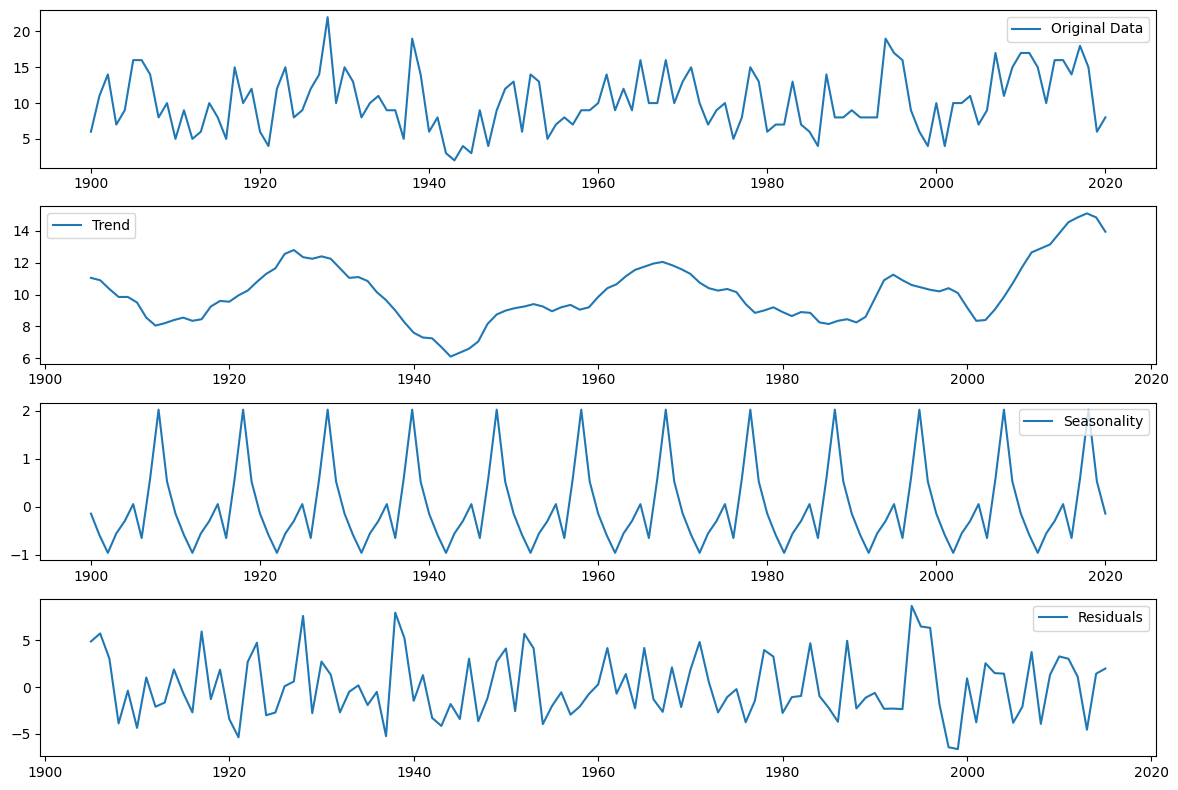

In [31]:
# Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsunami_counts, model='additive', period=10)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(tsunami_counts, label='Original Data')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Autocorrelation and Partial Autocorrelation Plots
### These plots visualize the autocorrelation and partial autocorrelation functions for the differenced tsunami time series data.

## Autocorrelation (ACF) Plot:

### Y-axis: Autocorrelation values.
### X-axis: Lag.
#### The ACF plot shows the correlation of the time series with its own lagged values. The significant spikes outside the confidence interval indicate lags where the autocorrelation is statistically significant.
## Partial Autocorrelation (PACF) Plot:

### Y-axis: Partial autocorrelation values.
### X-axis: Lag.
#### The PACF plot shows the correlation of the time series with its own lagged values, after removing the effects of intermediate lags. The significant spikes outside the confidence interval indicate the order of AR terms.
#### These plots are useful for identifying the appropriate parameters for ARIMA models in time series analysis.

/tmp/ipykernel_34/3669681246.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tsunami_counts.index = pd.date_range(start='1900', periods=len(tsunami_counts), freq='Y')


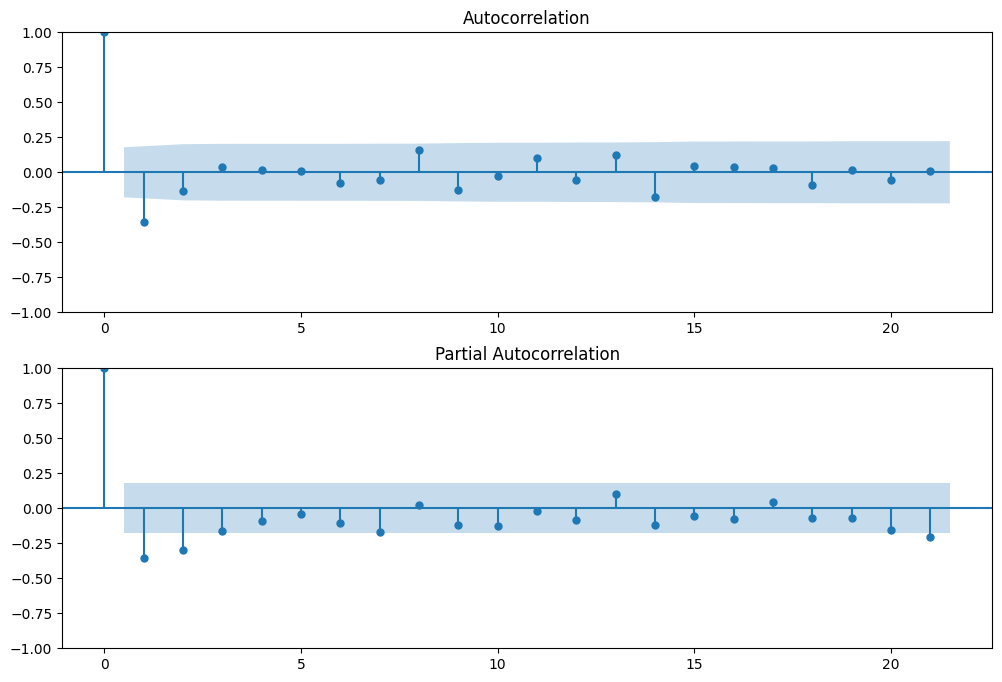

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming tsunami_counts is your time series data
# Ensure your index is a datetime index ending in 2020
tsunami_counts.index = pd.date_range(start='1900', periods=len(tsunami_counts), freq='Y')

# Plot ACF and PACF
fig, ax = plt.subplots(2, figsize=(12, 8))
plot_acf(tsunami_counts.diff().dropna(), ax=ax[0])
plot_pacf(tsunami_counts.diff().dropna(), ax=ax[1])
plt.show()


## SARIMAX Model Results
### This table displays the results of the SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model applied to the tsunami data.

#### Model Summary:
Dependent Variable: Count
Model: SARIMAX(1, 1, 1)x(1, 1, 1, 10)
Number of Observations: 121
Log Likelihood: -322.858
AIC (Akaike Information Criterion): 655.717
BIC (Bayesian Information Criterion): 669.219
HQIC (Hannan-Quinn Information Criterion): 661.193
Sample Period: 12-31-1900 to 12-31-2020
#### Coefficients:
ar.L1 (AR Term): 0.3160 (p-value: 0.003)
ma.L1 (MA Term): -0.9722 (p-value: 0.000)
ar.S.L10 (Seasonal AR Term): 0.0066 (p-value: 0.962)
ma.S.L10 (Seasonal MA Term): -0.9993 (p-value: 0.978)
sigma2 (Variance of the error term): 15.9346 (p-value: 0.027)
Diagnostic Tests:
Ljung-Box (Q): 0.13 (p-value: 0.72)
Jarque-Bera (JB): 2.82 (p-value: 0.24)
Heteroskedasticity (H): 0.91 (p-value: 0.91)
Skew: 0.33
Kurtosis: 2.58

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime



# Define the model parameters based on ACF and PACF analysis
p = 1
d = 1
q = 1
P = 1  # Seasonal AR term
D = 1  # Seasonal differencing
Q = 1  # Seasonal MA term
s = 10  # Seasonal period (e.g., 10 years if annual data)

# Fit the SARIMA model
model = SARIMAX(tsunami_counts, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

print(results.summary())

# Forecast the next 10 years from 2021
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=tsunami_counts.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Combine the original data and forecast for plotting decomposed components with forecast
full_data = pd.concat([tsunami_counts, forecast_values])



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78066D+00    |proj g|=  6.38168D-02

At iterate    5    f=  2.67183D+00    |proj g|=  2.65263D-02

At iterate   10    f=  2.67002D+00    |proj g|=  1.45590D-02

At iterate   15    f=  2.66835D+00    |proj g|=  6.74577D-03

At iterate   20    f=  2.66830D+00    |proj g|=  1.08348D-04

At iterate   25    f=  2.66829D+00    |proj g|=  4.42680D-04

At iterate   30    f=  2.66827D+00    |proj g|=  2.52244D-03

At iterate   35    f=  2.66826D+00    |proj g|=  6.32819D-04

At iterate   40    f=  2.66825D+00    |proj g|=  1.68223D-04

At iterate   45    f=  2.66825D+00    |proj g|=  2.36597D-04

At iterate   50    f=  2.66825D+00    |proj g|=  2.70337D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_34/3358811565.py:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=tsunami_counts.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


## Chi-Square Test
 ### A chi-square test to check the independence between two categorical variables.

In [34]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['MAGNITUDE_CAT'], df['REGION'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("There is a significant association between 'MAGNITUDE_CAT' and 'REGION'")
else:
    print("There is no significant association between 'MAGNITUDE_CAT' and 'REGION'")


Chi-Square Statistic: 159.10514397205336
P-value: 2.8705456287588696e-10
There is a significant association between 'MAGNITUDE_CAT' and 'REGION'


## Linear Regression 
###  model the relationship between tsunami intensity and earthquake magnitude using linear regression.

In [35]:
import statsmodels.api as sm

# Prepare the data for linear regression
X = df['EQ_MAGNITUDE']
y = df['TS_INTENSITY']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           TS_INTENSITY   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.82
Date:                Tue, 02 Jul 2024   Prob (F-statistic):            0.00102
Time:                        17:58:31   Log-Likelihood:                -3768.2
No. Observations:                2259   AIC:                             7540.
Df Residuals:                    2257   BIC:                             7552.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4692      0.296      1.583   

## Ordinary Least Squares (OLS) Regression
### Perform a more detailed regression analysis using OLS.

In [36]:
# Prepare the data for OLS regression
X = df[['EQ_MAGNITUDE', 'EQ_DEPTH']] 
y = df['TS_INTENSITY']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           TS_INTENSITY   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.987
Date:                Tue, 02 Jul 2024   Prob (F-statistic):            0.00255
Time:                        17:58:34   Log-Likelihood:                -3767.6
No. Observations:                2259   AIC:                             7541.
Df Residuals:                    2256   BIC:                             7558.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4770      0.296      1.609   

#### Chi-Square Test: This test checks whether there is a significant association between two categorical variables.
####  Linear Regression: This simple regression model helps understand the relationship between tsunami intensity and earthquake magnitude.
#### OLS Regression: A more detailed regression model that can include multiple independent variables to better understand the relationships in your data.

## Tsunami Count Forecast
### This line chart presents the observed and forecasted number of tsunamis from 1900 to 2020, along with the forecasted values for the future period.

#### Blue Line: Observed number of tsunamis per year.
#### Red Line: Forecasted number of tsunamis.
#### Shaded Area: Forecast confidence interval, indicating the range within which the true values are likely to fall.
### The chart helps visualize the historical trend of tsunami occurrences and provides predictions for future counts, including the associated uncertainty.

/tmp/ipykernel_34/1859095142.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=tsunami_counts.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


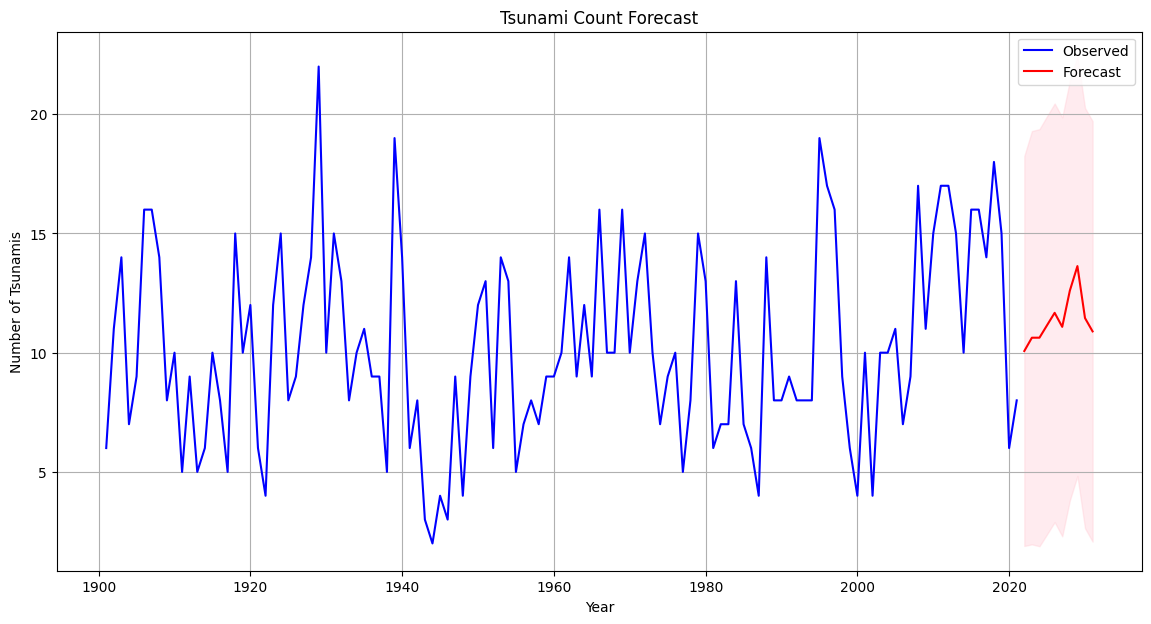

In [37]:
# Forecast the next 10 years from 2021
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=tsunami_counts.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(tsunami_counts, label='Observed', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Tsunami Count Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Tsunamis')
plt.legend()
plt.grid(True)
plt.show()
